# Package import

In [1149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Linear regression with one variable

In [1150]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])


**Ex. 1.**

In [1151]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [1152]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Ex. 2.**

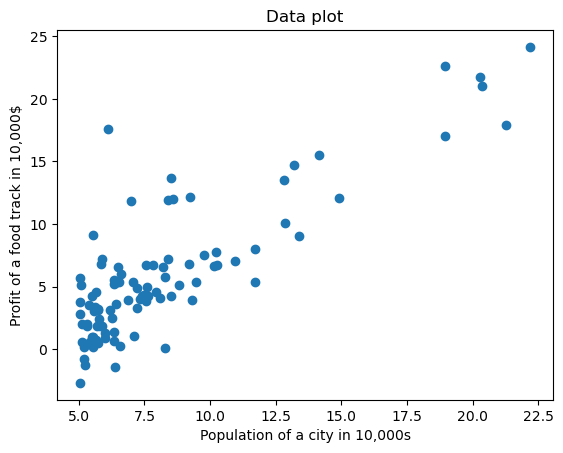

In [1153]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x,y)
plt.title('Data plot')
plt.xlabel('Population of a city in 10,000s')
plt.ylabel('Profit of a food track in 10,000$')
plt.show()

**Ex. 3.**

In [1154]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
X

array([[ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ],
       [ 6.110

**Ex. 4.**

In [1155]:
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [1156]:
y

array([[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695, 

In [1157]:
theta

array([[0.],
       [0.]], dtype=float32)

**Ex. 5.**

In [1158]:
def computeCost(X, y, theta):
    diff_sq = (theta.T@X - y)**2
    return diff_sq.sum()/(X.shape[1]*2)

**Ex. 6.**

In [1159]:
computeCost(X, y, theta)

32.072733877455676

**Ex. 7.**

In [1160]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        theta = theta - ((alpha / X.shape[1]) * (theta.T @ X - y) @ X.T).T
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [1161]:
alpha = 0.01
it = 1000

**Ex. 8.**

In [1162]:
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[-3.24140214],
       [ 1.1272942 ]])

**Ex. 9.**

In [1163]:
cost[-1]

4.515955503078914

**Ex. 10.**

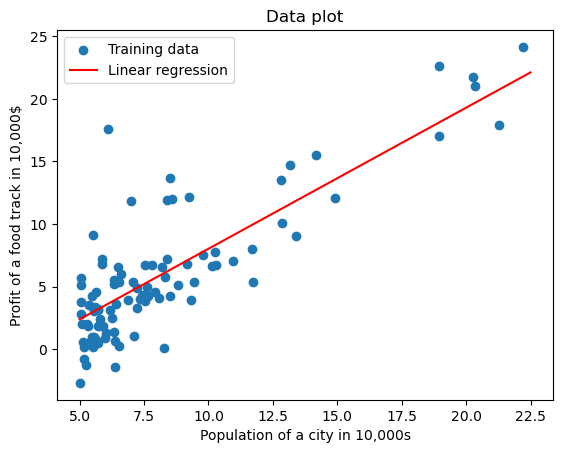

In [1164]:
x_line = np.arange(5, 22.5, 0.01)
y_line = theta[0] + theta[1]*x_line
plt.scatter(x,y)
plt.plot(x_line, y_line,'r')
plt.title('Data plot')
plt.xlabel('Population of a city in 10,000s')
plt.ylabel('Profit of a food track in 10,000$')
plt.legend(['Training data', 'Linear regression'])
plt.show()

**Ex. 11.**

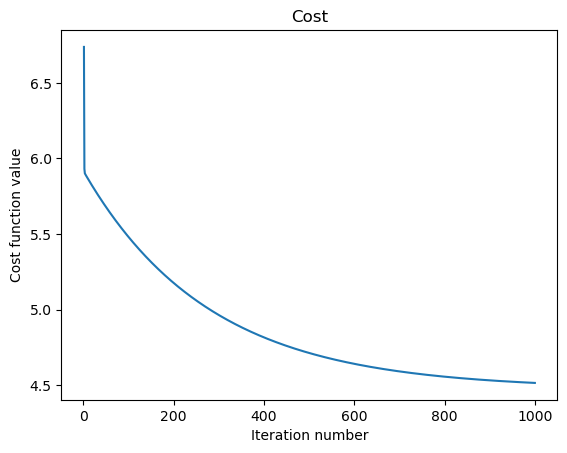

In [1165]:
x_cost = np.arange(1, it + 1)
plt.plot(x_cost, cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Cost')
plt.show()

# Linear regression with multiple variables

In [1166]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900



**Ex. 1.**

In [1167]:
data2_normalized = data2.copy()
for column in ['Size', 'Bedrooms']:
    data2_normalized[column] = (data2_normalized[column] - data2_normalized[column].mean())/data2_normalized[column].std()

**Ex. 2.**

In [1168]:
x = data2_normalized.values[:, 0:2]
y = data2_normalized.values[:, 2]
X = np.concatenate([np.ones((x.shape[0], 1), dtype=np.float32), x], axis=1).T
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [1169]:
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[340397.96353532],
       [109848.00846026],
       [ -5866.45408497]])

In [1170]:
cost[-1]

2043544218.7812896

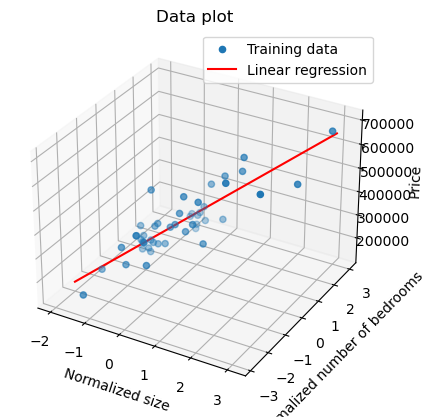

In [1171]:
x1_line = np.arange(-2,3,0.01)
x2_line = np.arange(-2,3,0.01)
y_line = theta[0] + theta[1]*x1_line + theta[2]*x2_line
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.plot(x1_line, x2_line, y_line, 'r')
ax.set_title('Data plot')
ax.set_xlabel('Normalized size')
ax.set_ylabel('Normalized number of bedrooms')
ax.set_zlabel('Price')
ax.legend(['Training data', 'Linear regression'])
plt.show()

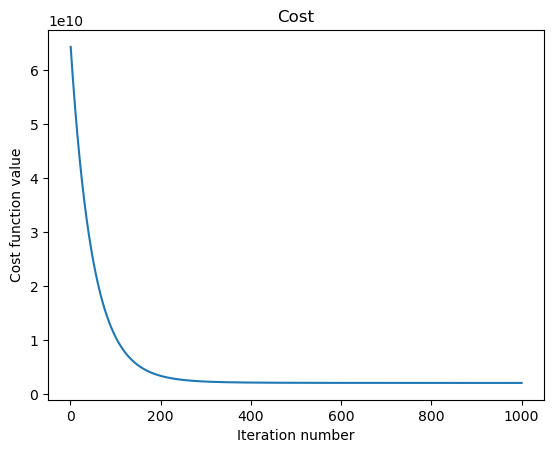

In [1172]:
x_cost = np.arange(1, it + 1)
plt.plot(x_cost, cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Cost')
plt.show()

# Linear regression - Python packages

In [1173]:
# Data import
Demand = pd.read_csv('Daily_Demand_Forecasting_Orders.csv', sep=";")
Demand.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [1174]:
# I will try to predict the Target without columns below (they have too large influence on Y)
Demand = Demand.drop('Order type A', axis=1)
Demand = Demand.drop('Order type B', axis=1)
Demand = Demand.drop('Order type C', axis=1)
Demand.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,6.459,48534,19646,16411,20257,210.517


In [1175]:
Demand.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [1176]:
# Normalization
Demand_normalized = Demand.copy()
for column in Demand_normalized.drop('Target (Total orders)',axis=1):
    Demand_normalized[column] = (Demand_normalized[column] - Demand_normalized[column].mean())/Demand_normalized[column].std()
Demand_normalized.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,-1.572938,-0.023779,2.068203,3.840471,-0.414987,1.725841,-0.038187,2.691299,-0.632918,539.577
1,-1.572938,0.689602,-0.631918,-0.842034,-0.414987,-0.334922,-0.558192,0.248356,-1.173987,224.675
2,-1.572938,1.402984,-1.854578,-1.271427,-0.407556,-2.665404,-0.955067,-1.434325,-0.621205,129.412
3,-0.792969,-1.450542,-0.018098,0.321894,-0.317637,0.448163,-0.286104,-0.255466,-0.356831,317.120
4,-0.792969,-0.737161,-1.180088,-0.198552,-0.380355,0.330356,-0.596957,-1.555151,-0.217343,210.517


In [1177]:
# Split into train and test sets (70-30%)
x = Demand.drop('Target (Total orders)',axis=1)
y = Demand[['Target (Total orders)']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# Creating an object
regr = linear_model.LinearRegression()

# Learning model on training data
regr.fit(X_train, Y_train)

# Predicting values using test data
Y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [[-6.77204169e-01  3.86205916e+00  1.15197658e+00  1.16258377e+00
   1.32234291e-02 -6.54523784e-04 -1.42872932e-04 -2.53650754e-04
  -2.06454858e-04]]
Residual sum of squares: Target (Total orders)    447.822121
dtype: float64


C:\Users\szmuk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [1178]:
regr.score(X_test, Y_test)

0.9241985866405703

In [1179]:
Df = pd.DataFrame({'Test data': Y_test.to_numpy().squeeze(),
                   'Prediction': Y_predicted.squeeze(),
                   'Absolute error': np.abs(Y_predicted - Y_test.to_numpy()).squeeze()})
Df

,Test data,Prediction,Absolute error
0,235.598,232.450684,3.147316
1,253.847,257.835348,3.988348
2,331.900,342.701629,10.801629
3,490.790,415.470789,75.319211
4,243.568,240.067688,3.500312
5,129.412,164.361201,34.949201
6,307.645,309.881743,2.236743
7,304.950,323.354517,18.404517
8,415.187,406.308171,8.878829
9,297.174,289.195964,7.978036
